<a href="https://colab.research.google.com/github/Mohammadreza-Rajabpoure/Energy-Consumption-Analysis-and-forecast/blob/main/Energy_Consumption_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime,date,time
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import TimeSeriesSplit
color_palette = sns.color_palette()
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from math import sqrt
from numpy import concatenate
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KAG_energydata_complete.csv')
df

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [ ]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [ ]:
df2 = df.drop(columns=['rv1' ,	'rv2','date', 'Appliances',	'lights','T_out', 'Press_mm_hg', 'RH_out', 	'Windspeed', 'Visibility', 'Tdewpoint','T6', 	'RH_6'])


In [ ]:
df_temp_in = df2.drop(columns=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_7','RH_8','RH_9'])
avreg_temp= df_temp_in.mean(axis=1)


In [ ]:
df_humidity = df2.drop(columns=['T1','T2','T3','T4','T5','T8','T7','T9'])
avreg_humidity = df_humidity.mean(axis=1)

In [ ]:
final_df = df.drop(columns=['T1', 'RH_1', 'T2', 'RH_2', 'T3',	'RH_3',	'T4' , 'RH_4', 	'T5' ,	'RH_5' ,	'T7', 'RH_7' ,	'T8' ,	'RH_8',
                            'T9', 	'RH_9', 'rv1' ,	'rv2'])
final_df.insert(3, 'Avreg_T_in', avreg_temp, True)
final_df.insert(4, 'Avreg_RH_in', avreg_humidity, True)
final_df.head()

date  Appliances  lights  Avreg_T_in  Avreg_RH_in        T6  \
0  2016-01-11 17:00:00          60      30   18.435000    46.742500  7.026667   
1  2016-01-11 17:10:00          60      30   18.439167    46.672708  6.833333   
2  2016-01-11 17:20:00          50      30   18.421667    46.562917  6.560000   
3  2016-01-11 17:30:00          50      40   18.396250    46.468750  6.433333   
4  2016-01-11 17:40:00          60      40   18.408750    46.462917  6.366667   

        RH_6     T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  
0  84.256667  6.600000        733.5    92.0   7.000000   63.000000        5.3  
1  84.063333  6.483333        733.6    92.0   6.666667   59.166667        5.2  
2  83.156667  6.366667        733.7    92.0   6.333333   55.333333        5.1  
3  83.423333  6.250000        733.8    92.0   6.000000   51.500000        5.0  
4  84.893333  6.133333        733.9    92.0   5.666667   47.666667        4.9

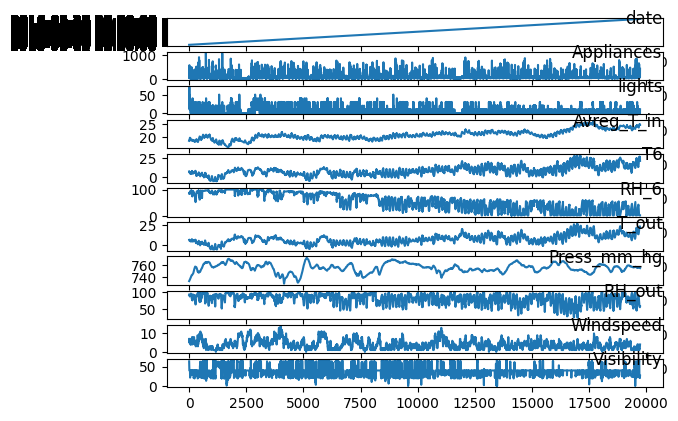

In [ ]:
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11]
i = 1
# plot each column
plt.figure()
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(final_df.values[:, group])
 plt.title(final_df.columns[group], y=0.5, loc='right')
 i += 1
plt.show()

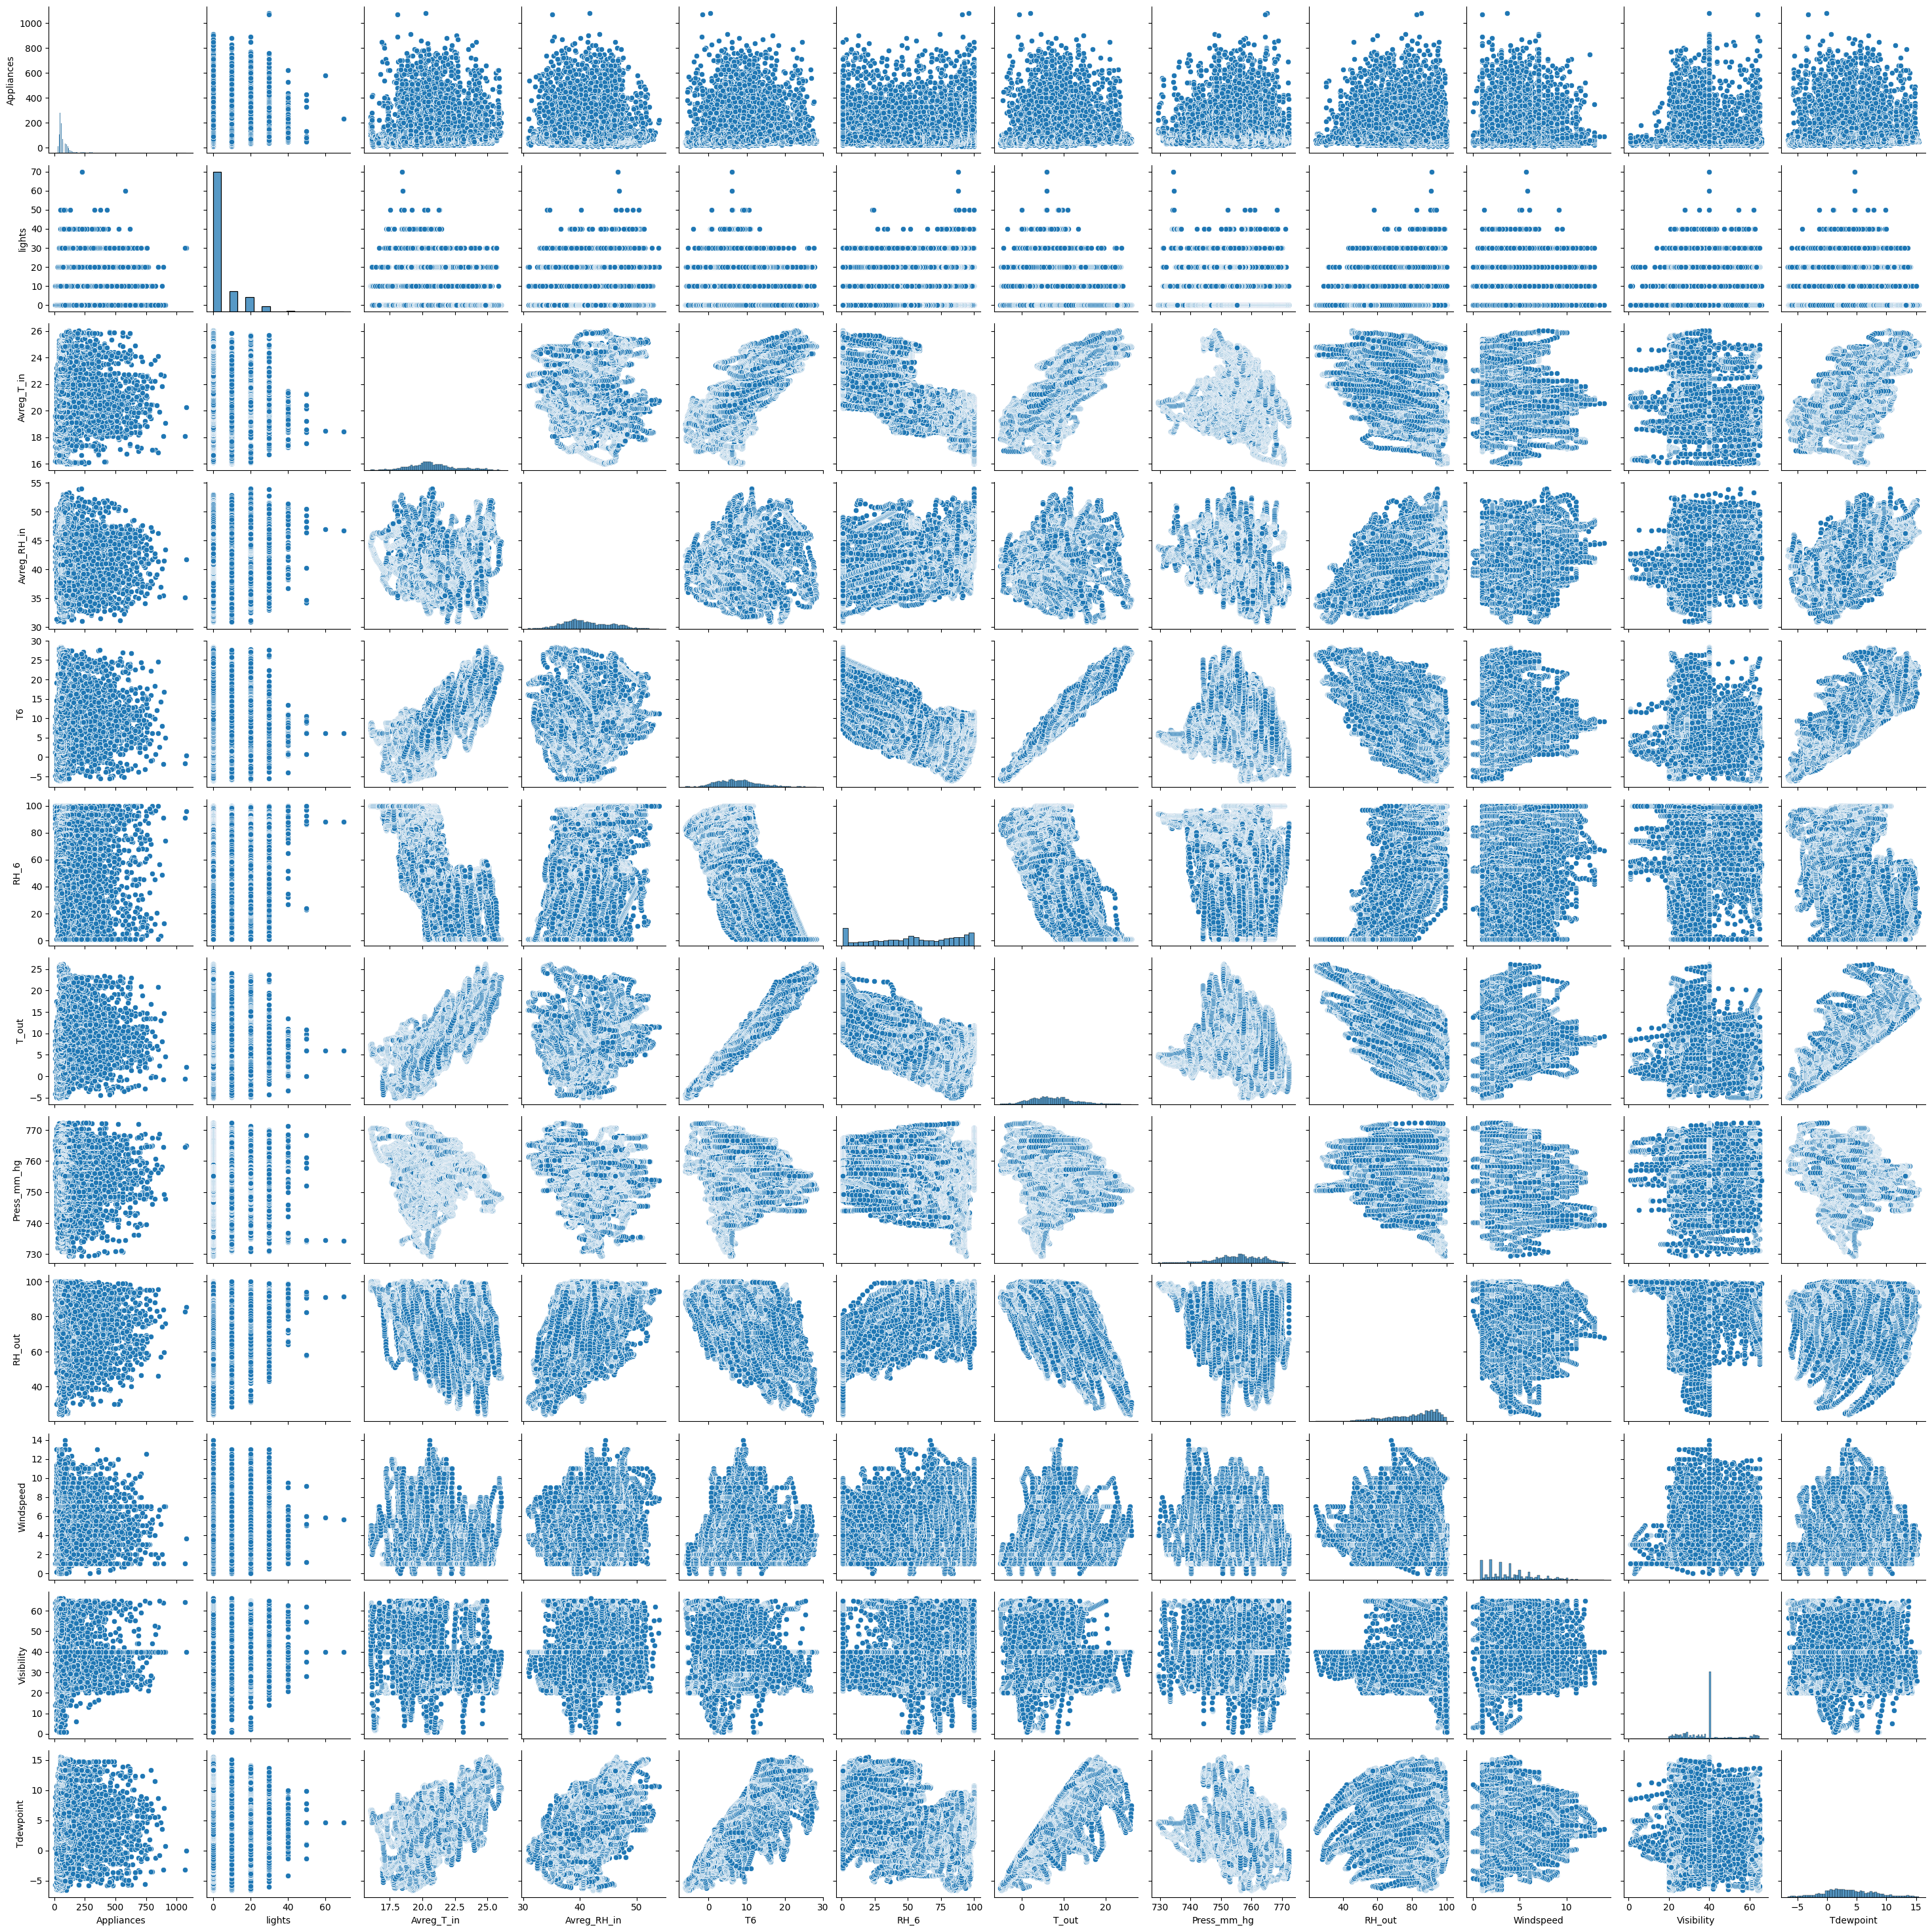

In [ ]:
sns.pairplot(final_df, kind='scatter')

In [ ]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   Avreg_T_in   19735 non-null  float64       
 4   Avreg_RH_in  19735 non-null  float64       
 5   T6           19735 non-null  float64       
 6   RH_6         19735 non-null  float64       
 7   T_out        19735 non-null  float64       
 8   Press_mm_hg  19735 non-null  float64       
 9   RH_out       19735 non-null  float64       
 10  Windspeed    19735 non-null  float64       
 11  Visibility   19735 non-null  float64       
 12  Tdewpoint    19735 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 2.0 MB


In [ ]:

final_df.set_index('date', inplace=True)


In [ ]:
final_df.head()

Appliances  lights  Avreg_T_in  Avreg_RH_in        T6  \
date                                                                         
2016-01-11 17:00:00          60      30   18.435000    46.742500  7.026667   
2016-01-11 17:10:00          60      30   18.439167    46.672708  6.833333   
2016-01-11 17:20:00          50      30   18.421667    46.562917  6.560000   
2016-01-11 17:30:00          50      40   18.396250    46.468750  6.433333   
2016-01-11 17:40:00          60      40   18.408750    46.462917  6.366667   

                          RH_6     T_out  Press_mm_hg  RH_out  Windspeed  \
date                                                                       
2016-01-11 17:00:00  84.256667  6.600000        733.5    92.0   7.000000   
2016-01-11 17:10:00  84.063333  6.483333        733.6    92.0   6.666667   
2016-01-11 17:20:00  83.156667  6.366667        733.7    92.0   6.333333   
2016-01-11 17:30:00  83.423333  6.250000        733.8    92.0   6.000000   
2016-01-11 17:40:00  84.893333  6.133333        733.9    92.0   5.666667   

                     Visibility  Tdewpoint  
date                                        
2016-01-11 17:00:00   63.000000        5.3  
2016-01-11 17:10:00   59.166667        5.2  
2016-01-11 17:20:00   55.333333        5.1  
2016-01-11 17:30:00   51.500000        5.0  
2016-01-11 17:40:00   47.666667        4.9

plot each feauture frequency by time to undrestand the corolations with time

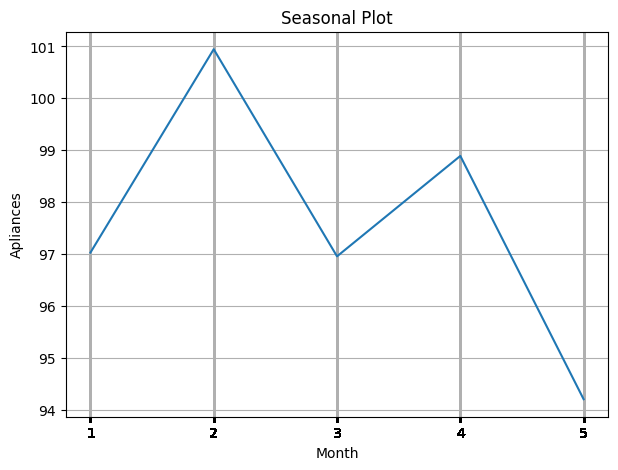

In [ ]:

# Seasonal plot
plt.figure(figsize=(7, 5))
sns.lineplot(x=final_df.index.month, y=final_df['Appliances'], ci=None)
plt.xlabel('Month')
plt.ylabel('Apliances')
plt.title('Seasonal Plot')
plt.xticks(final_df.index.month)
plt.grid(True)
plt.show()


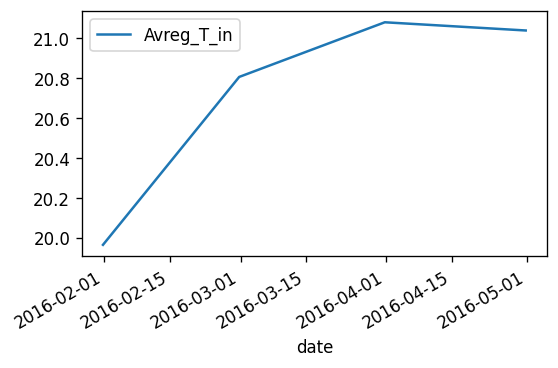

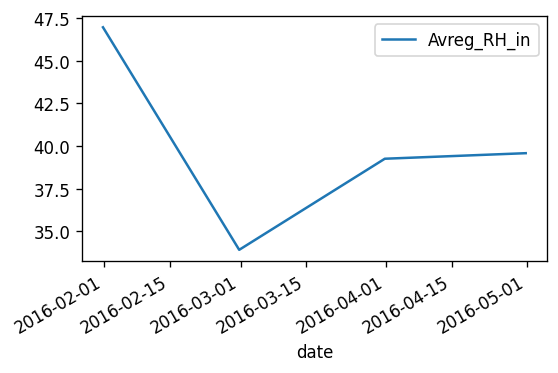

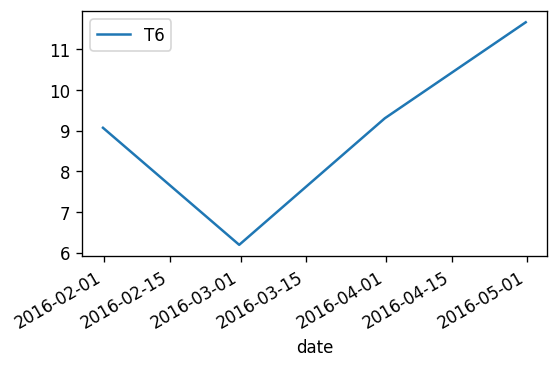

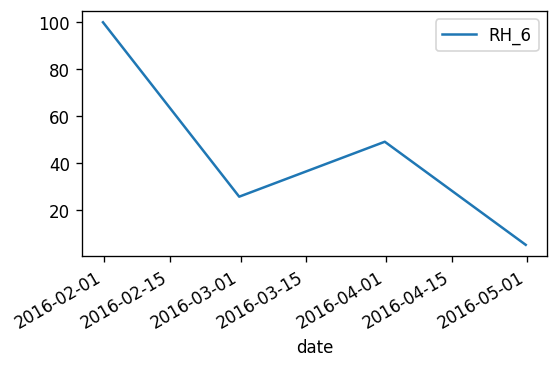

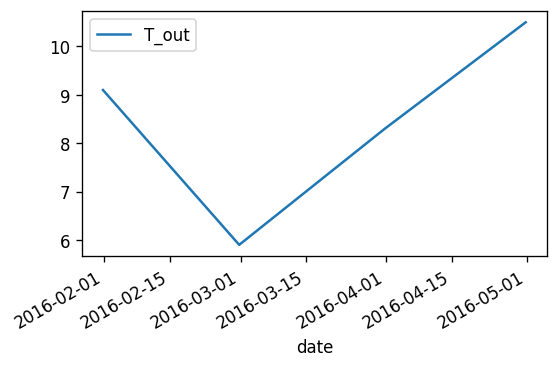

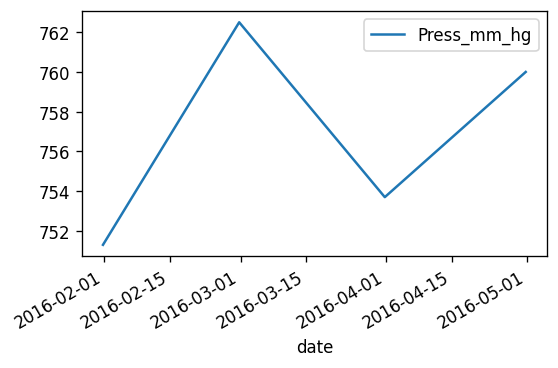

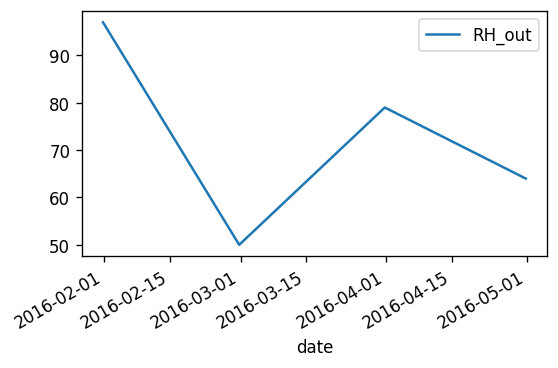

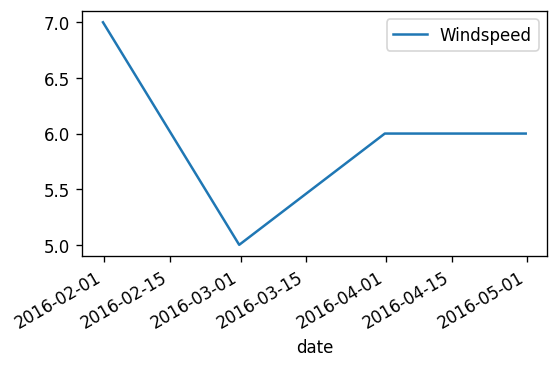

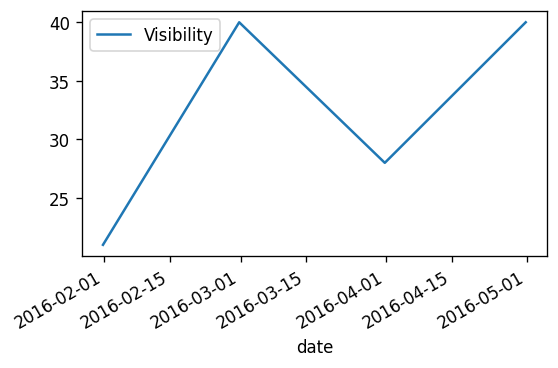

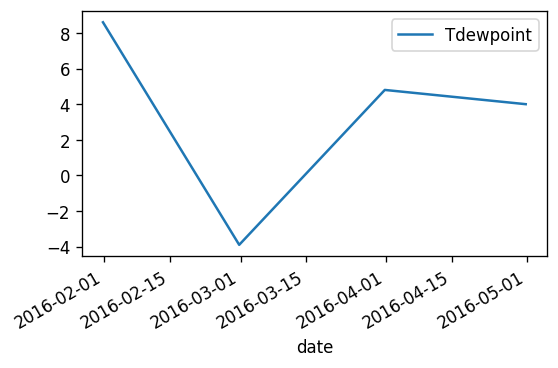

In [ ]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 120})
columns = ['Avreg_T_in', 	'Avreg_RH_in', 	'T6', 	'RH_6', 	'T_out', 	'Press_mm_hg', 	'RH_out', 	'Windspeed', 	'Visibility', 	'Tdewpoint']
#monthly plots
for column in columns:
  final_df[column].asfreq('M').plot(legend=True)
  lagged_plot = final_df[column].asfreq('M').shift(90).plot(legend=True)
  lagged_plot.legend([column])
  plt.show()


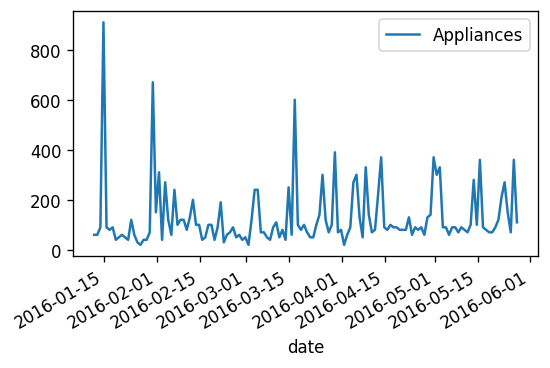

In [ ]:
plt.rcParams.update({'figure.figsize': (5, 3), 'figure.dpi': 120})
#monthly plots per day
final_df['Appliances'].asfreq('D').plot(legend=True)
plt.show()

mean for each feautures in each month

In [ ]:
columns = list(final_df.columns)
df_mean = pd.DataFrame(columns=columns)
for column in columns :
  df_mean[column] = final_df[column].resample('M').mean()
df_mean

Appliances    lights  Avreg_T_in  Avreg_RH_in         T6  \
date                                                                   
2016-01-31   97.026010  4.722793   18.533881    44.282411   3.894547   
2016-02-29  100.945881  6.343391   19.975663    42.714054   4.880271   
2016-03-31   96.953405  3.915771   20.275105    38.948835   5.856132   
2016-04-30   98.888889  2.416667   21.329048    39.837684   9.276930   
2016-05-31   94.199325  1.770049   23.506916    41.469433  15.090683   

                 RH_6      T_out  Press_mm_hg     RH_out  Windspeed  \
date                                                                  
2016-01-31  92.175166   4.128936   758.947467  86.607461   4.795517   
2016-02-29  79.961223   4.817301   753.387033  84.230125   4.847821   
2016-03-31  54.873425   5.439415   755.840916  80.734991   3.992832   
2016-04-30  34.089611   8.513449   754.606319  77.209954   3.652431   
2016-05-31  21.342920  13.762717   755.898430  71.402673   3.079419   

            Visibility  Tdewpoint  
date                               
2016-01-31   39.790554   1.986071  
2016-02-29   38.762332   2.193894  
2016-03-31   40.116599   2.135540  
2016-04-30   36.322338   4.387639  
2016-05-31   36.939138   7.984661

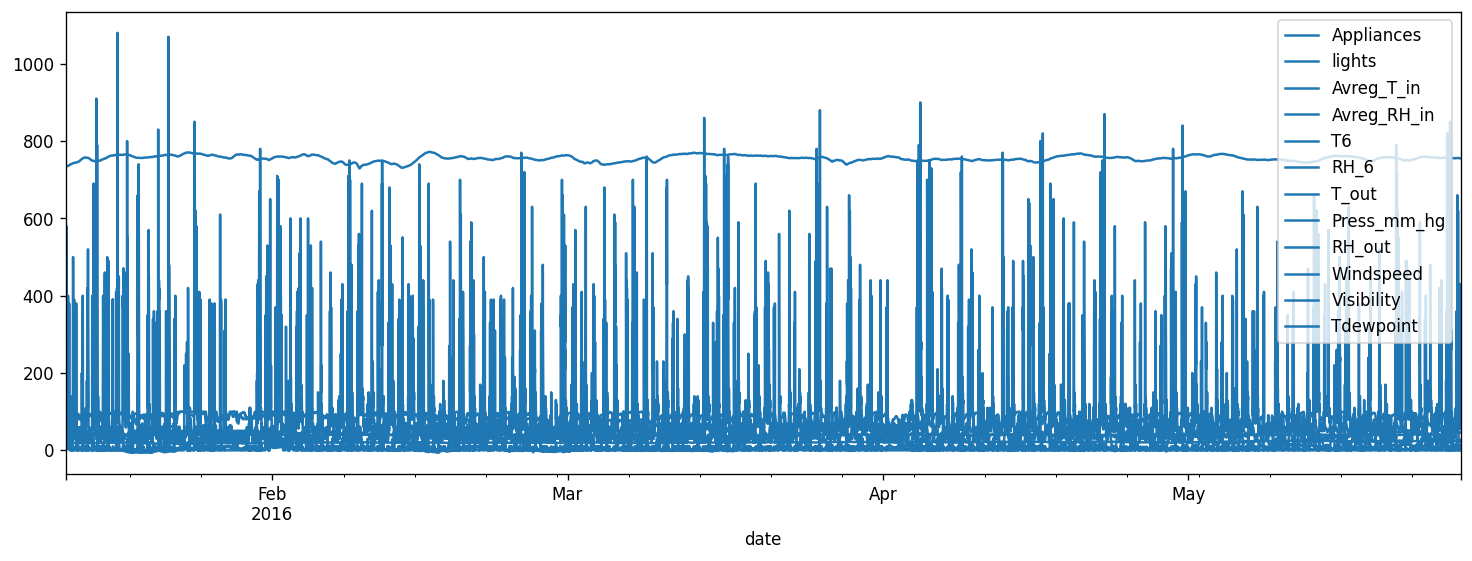

In [ ]:
final_df.plot(style='-', figsize=(15,5), color=color_palette[0],)
plt.legend()
plt.show()

<Axes: xlabel='date'>

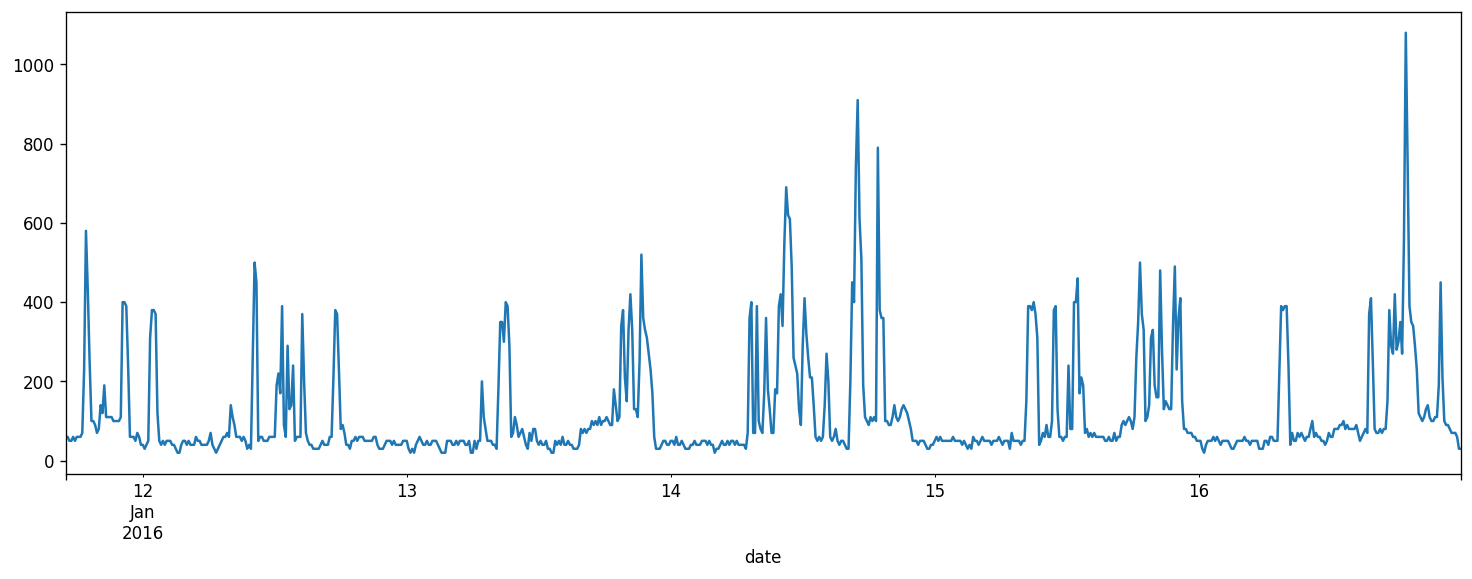

In [ ]:
#one_week plot
final_df.loc[(final_df.index >= '2016-01-11') & (final_df.index < '2016-01-17')]['Appliances'].plot(figsize=(15,5))


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   Avreg_T_in   19735 non-null  float64       
 4   Avreg_RH_in  19735 non-null  float64       
 5   T6           19735 non-null  float64       
 6   RH_6         19735 non-null  float64       
 7   T_out        19735 non-null  float64       
 8   Press_mm_hg  19735 non-null  float64       
 9   RH_out       19735 non-null  float64       
 10  Windspeed    19735 non-null  float64       
 11  Visibility   19735 non-null  float64       
 12  Tdewpoint    19735 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 2.0 MB


In [ ]:
final_df = final_df.sort_index()
scaler = StandardScaler()
X = (final_df.drop(columns=['Appliances','date']))

y = (final_df[['Appliances']])

In [ ]:


tscv = TimeSeriesSplit( n_splits=5 , test_size=6*24*10, gap = 6*24)
g_tscv = []
for train_index , test_index in tscv.split(X):

  X_train = X.loc[train_index]
  X_test = X.loc[test_index]

  y_train = y.loc[train_index]
  y_test = y.loc[test_index]

  g_tscv.append((scaler.fit_transform(X_train), scaler.fit_transform(y_train)))

In [ ]:

#
#
#tscv = [(train,test) for train, test in TimeSeriesSplit( n_splits=5 , test_size=6*24*10, gap = 6*24).split(X)]
#
xg_model = XGBRegressor()
params={'eta':[0.01,0.001], 'max_depth':[6,3,4], 'subsample':[0.5], 'n_estimators':[100,50]}

xg_cv = GridSearchCV(estimator=xg_model, param_grid=params, cv=tscv)

for x,y in g_tscv:
  xg_cv.fit(x,y)
  print('best_params', xg_cv.best_params_)
  print('best_score', xg_cv.best_score_)







best_params {'eta': 0.01, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.5}
best_score 0.03424690705189772
best_params {'eta': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
best_score 0.035484837704994464
best_params {'eta': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
best_score 0.053051745407426944
best_params {'eta': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
best_score 0.0344823421338911
best_params {'eta': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
best_score 0.03404816352865916


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
Rparams = {'n_estimators':[100,200,150], 'random_state':[1,2,3,4]}

Rg_cv = GridSearchCV(estimator=reg, param_grid=Rparams, cv=tscv)

for x,y in g_tscv:
  Rg_cv.fit(x,y)
  print('best_params', Rg_cv.best_params_)
  print('best_score', Rg_cv.best_score_)


best_params {'n_estimators': 150, 'random_state': 4}
best_score -0.5505859883666608
best_params {'n_estimators': 200, 'random_state': 2}
best_score -0.7418543075991793
best_params {'n_estimators': 200, 'random_state': 2}
best_score -0.7615099532141798
best_params {'n_estimators': 200, 'random_state': 4}
best_score -0.801764507920564
best_params {'n_estimators': 100, 'random_state': 4}
best_score -1.1922334170427582


In [ ]:
XGB = XGBRegressor(eta=0.01, max_depth= 3, n_estimators=50, subsample=0.5)
scors = []
for train_index , test_index in tscv.split(X):

  X_train = scaler.fit_transform(X.loc[train_index])
  X_test = scaler.fit_transform(X.loc[test_index])

  y_train = scaler.fit_transform(y.loc[train_index])
  y_test = scaler.fit_transform(y.loc[test_index])

  XGB.fit(X_train, y_train)
  y_predict = XGB.predict(X_test)

  scors.append((XGB.score(X_train,y_train),XGB.score(X_test,y_test)))

print(scors)






[(0.08144665124350525, 0.026842996292634203), (0.07201273461410207, 0.0606748525974391), (0.07214635964504523, 0.010555173164294218), (0.06502782917544525, 0.059901539777026724), (0.06386379805214604, 0.025908781008464277)]


LSTM

In [ ]:
final_df



date  Appliances  lights  Avreg_T_in  Avreg_RH_in  \
0     2016-01-11 17:00:00          60      30   18.435000    46.742500   
1     2016-01-11 17:10:00          60      30   18.439167    46.672708   
2     2016-01-11 17:20:00          50      30   18.421667    46.562917   
3     2016-01-11 17:30:00          50      40   18.396250    46.468750   
4     2016-01-11 17:40:00          60      40   18.408750    46.462917   
...                   ...         ...     ...         ...          ...   
19730 2016-05-27 17:20:00         100       0   24.869583    46.137881   
19731 2016-05-27 17:30:00          90       0   24.846810    46.089286   
19732 2016-05-27 17:40:00         270      10   24.818571    46.237738   
19733 2016-05-27 17:50:00         420      10   24.758312    46.242246   
19734 2016-05-27 18:00:00         430      10   24.740452    46.190804   

              T6       RH_6      T_out  Press_mm_hg     RH_out  Windspeed  \
0       7.026667  84.256667   6.600000        733.5  92.000000   7.000000   
1       6.833333  84.063333   6.483333        733.6  92.000000   6.666667   
2       6.560000  83.156667   6.366667        733.7  92.000000   6.333333   
3       6.433333  83.423333   6.250000        733.8  92.000000   6.000000   
4       6.366667  84.893333   6.133333        733.9  92.000000   5.666667   
...          ...        ...        ...          ...        ...        ...   
19730  24.796667   1.000000  22.733333        755.2  55.666667   3.333333   
19731  24.196667   1.000000  22.600000        755.2  56.000000   3.500000   
19732  23.626667   1.000000  22.466667        755.2  56.333333   3.666667   
19733  22.433333   1.000000  22.333333        755.2  56.666667   3.833333   
19734  21.026667   1.000000  22.200000        755.2  57.000000   4.000000   

       Visibility  Tdewpoint  
0       63.000000   5.300000  
1       59.166667   5.200000  
2       55.333333   5.100000  
3       51.500000   5.000000  
4       47.666667   4.900000  
...           ...        ...  
19730   23.666667  13.333333  
19731   24.500000  13.300000  
19732   25.333333  13.266667  
19733   26.166667  13.233333  
19734   27.000000  13.200000  

[19735 rows x 13 columns]

In [ ]:
import math
from keras.models import Sequential
from keras.layers import LSTM, Dense ,Dropout

forecast with changing timeseries dataset to supervised dataset

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()

  # input sequence (t-n, ... t-1)

  for i in range(n_in, 0, -1):

    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
   cols.append(df.shift(-i))
   if i == 0:
    names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
   else:
    names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
   # put it all together
   agg = concat(cols, axis=1)
   agg.columns = names
   # drop rows with NaN values
   if dropnan:
    agg.dropna(inplace=True)
   return agg

In [ ]:
values = final_df.drop(columns=['date']).astype(float)

#normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#define lag for 3
n_min_lag = 3
n_feature = 12

# frame as supervised learning
final_df = series_to_supervised(scaled, n_min_lag, 1 )
final_df.head()

var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.046729   0.428571   0.241042   0.688169   0.381070   0.841827   
4   0.046729   0.428571   0.241457   0.685148   0.375443   0.839872   
5   0.037383   0.428571   0.239716   0.680396   0.367487   0.830704   
6   0.037383   0.571429   0.237186   0.676321   0.363800   0.833401   
7   0.046729   0.571429   0.238430   0.676068   0.361859   0.848264   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  ...   var3(t)   var4(t)  \
3   0.372990   0.097674   0.894737    0.500000  ...  0.237186  0.676321   
4   0.369239   0.100000   0.894737    0.476190  ...  0.238430  0.676068   
5   0.365488   0.102326   0.894737    0.452381  ...  0.236772  0.674211   
6   0.361736   0.104651   0.894737    0.428571  ...  0.236357  0.672281   
7   0.357985   0.106977   0.894737    0.404762  ...  0.234782  0.671199   

    var5(t)   var6(t)   var7(t)   var8(t)   var9(t)  var10(t)  var11(t)  \
3  0.363800  0.833401  0.361736  0.104651  0.894737  0.428571  0.776923   
4  0.361859  0.848264  0.357985  0.106977  0.894737  0.404762  0.717949   
5  0.359918  0.857095  0.354234  0.109302  0.894737  0.380952  0.658974   
6  0.358851  0.860364  0.350482  0.111628  0.894737  0.357143  0.600000   
7  0.356717  0.863734  0.351018  0.113178  0.892544  0.369048  0.600000   

   var12(t)  
3  0.524887  
4  0.520362  
5  0.515837  
6  0.511312  
7  0.510558  

[5 rows x 48 columns]

In [ ]:
#split train and test
values = final_df.values

#train for 3 month
n_train = (3*30*24*6)
train = values[:n_train, :]
test = values[n_train:, :]

n_observation = n_feature * n_min_lag

train_X, train_y = train[:, :n_observation], train[:, - n_feature]
test_X, test_y = test[:, :n_observation], test[:, - n_feature]
print(train_X.shape, len(train_X), train_y.shape)

(12960, 36) 12960 (12960,)


In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_min_lag, n_feature))
test_X = test_X.reshape((test_X.shape[0], n_min_lag, n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(12960, 3, 12) (12960,) (6772, 3, 12) (6772,)


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True ))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Epoch 1/50
180/180 - 4s - loss: 0.0490 - val_loss: 0.0415 - 4s/epoch - 22ms/step
Epoch 2/50
180/180 - 1s - loss: 0.0431 - val_loss: 0.0342 - 1s/epoch - 7ms/step
Epoch 3/50
180/180 - 2s - loss: 0.0392 - val_loss: 0.0310 - 2s/epoch - 11ms/step
Epoch 4/50
180/180 - 2s - loss: 0.0372 - val_loss: 0.0302 - 2s/epoch - 11ms/step
Epoch 5/50
180/180 - 1s - loss: 0.0365 - val_loss: 0.0288 - 1s/epoch - 7ms/step
Epoch 6/50
180/180 - 1s - loss: 0.0341 - val_loss: 0.0262 - 1s/epoch - 7ms/step
Epoch 7/50
180/180 - 1s - loss: 0.0320 - val_loss: 0.0259 - 1s/epoch - 6ms/step
Epoch 8/50
180/180 - 1s - loss: 0.0313 - val_loss: 0.0277 - 1s/epoch - 6ms/step
Epoch 9/50
180/180 - 1s - loss: 0.0304 - val_loss: 0.0247 - 1s/epoch - 6ms/step
Epoch 10/50
180/180 - 1s - loss: 0.0290 - val_loss: 0.0256 - 1s/epoch - 6ms/step
Epoch 11/50
180/180 - 1s - loss: 0.0298 - val_loss: 0.0241 - 1s/epoch - 7ms/step
Epoch 12/50
180/180 - 1s - loss: 0.0289 - val_loss: 0.0242 - 1s/epoch - 6ms/step
Epoch 13/50
180/180 - 2s - loss: 0

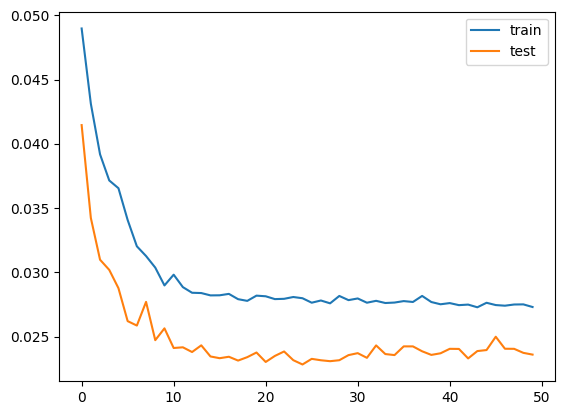

In [ ]:
#00fit

history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [ ]:
print(final_df.columns)

Index(['var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)',
       'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var9(t-3)', 'var10(t-3)',
       'var11(t-3)', 'var12(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)',
       'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)', 'var8(t-2)',
       'var9(t-2)', 'var10(t-2)', 'var11(t-2)', 'var12(t-2)', 'var1(t-1)',
       'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)',
       'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)', 'var11(t-1)',
       'var12(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)',
       'var12(t)'],
      dtype='object')


In [ ]:
original_df = final_df[['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)',
       'var12(t)']]
original_df = (pd.DataFrame(scaler.inverse_transform(original_df))).astype(float)

In [ ]:
original_df

0     1          2          3          4          5          6   \
0       50.0  40.0  18.396250  46.468750   6.433333  83.423333   6.250000   
1       60.0  40.0  18.408750  46.462917   6.366667  84.893333   6.133333   
2       50.0  40.0  18.392083  46.420000   6.300000  85.766667   6.016667   
3       60.0  50.0  18.387917  46.375417   6.263333  86.090000   5.900000   
4       60.0  50.0  18.372083  46.350417   6.190000  86.423333   5.916667   
...      ...   ...        ...        ...        ...        ...        ...   
19727  100.0   0.0  24.869583  46.137881  24.796667   1.000000  22.733333   
19728   90.0   0.0  24.846810  46.089286  24.196667   1.000000  22.600000   
19729  270.0  10.0  24.818571  46.237738  23.626667   1.000000  22.466667   
19730  420.0  10.0  24.758312  46.242246  22.433333   1.000000  22.333333   
19731  430.0  10.0  24.740452  46.190804  21.026667   1.000000  22.200000   

               7          8         9          10         11  
0      733.800000  92.000000  6.000000  51.500000   5.000000  
1      733.900000  92.000000  5.666667  47.666667   4.900000  
2      734.000000  92.000000  5.333333  43.833333   4.800000  
3      734.100000  92.000000  5.000000  40.000000   4.700000  
4      734.166667  91.833333  5.166667  40.000000   4.683333  
...           ...        ...       ...        ...        ...  
19727  755.200000  55.666667  3.333333  23.666667  13.333333  
19728  755.200000  56.000000  3.500000  24.500000  13.300000  
19729  755.200000  56.333333  3.666667  25.333333  13.266667  
19730  755.200000  56.666667  3.833333  26.166667  13.233333  
19731  755.200000  57.000000  4.000000  27.000000  13.200000  

[19732 rows x 12 columns]

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_min_lag*n_feature))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -11:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -11:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = (mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

212/212 [==============================] - 1s 2ms/step
Test RMSE: 3709.350


In [ ]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 60.904


In [ ]:
inv_y

array([ 90., 110., 100., ..., 270., 420., 430.])

**multivariate multi step by (Encoder_Decoder LSTM + stacked LSTM on the Decoder layer)**

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
df1 = final_df.drop(columns=['date'])

values = df1.values

#train for 3 month
n_train = 3*30*24*6
train = values[:n_train, :]
test = values[n_train:, :]


mscaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
print(len(train),len(test))

12960 6775


In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequences)):
 # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out
 # check if we are beyond the dataset
  if out_end_ix > len(sequences):
   break
 # gather input and output parts of the pattern
  seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)

for 3 time step X  and one time step y

In [ ]:
n_steps_in=3
n_steps_out=1

#split train and test
scaled_train = mscaler.fit_transform(train)
scaled_test = mscaler.fit_transform(test)

train_X, train_y = split_sequences(scaled_train, n_steps_in, n_steps_out)

test_X, test_y = split_sequences(scaled_test, n_steps_in, n_steps_out)

use Encoder_Decoder LSTM + stacked LSTM on the Decoder layer

In [ ]:
print(len(scaled_train), len(scaled_test))

12960 6775


In [ ]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(12957, 3, 12) (12957, 1, 12) (6772, 3, 12) (6772, 1, 12)


Epoch 1/200
180/180 [==============================] - 14s 42ms/step - loss: 0.0517 - val_loss: 0.0480
Epoch 2/200
180/180 [==============================] - 6s 33ms/step - loss: 0.0298 - val_loss: 0.0464
Epoch 3/200
180/180 [==============================] - 7s 40ms/step - loss: 0.0284 - val_loss: 0.0398
Epoch 4/200
180/180 [==============================] - 6s 33ms/step - loss: 0.0238 - val_loss: 0.0326
Epoch 5/200
180/180 [==============================] - 8s 45ms/step - loss: 0.0224 - val_loss: 0.0301
Epoch 6/200
180/180 [==============================] - 8s 45ms/step - loss: 0.0200 - val_loss: 0.0286
Epoch 7/200
180/180 [==============================] - 8s 45ms/step - loss: 0.0181 - val_loss: 0.0270
Epoch 8/200
180/180 [==============================] - 6s 33ms/step - loss: 0.0160 - val_loss: 0.0234
Epoch 9/200
180/180 [==============================] - 7s 38ms/step - loss: 0.0148 - val_loss: 0.0217
Epoch 10/200
180/180 [==============================] - 7s 37ms/step - loss: 0.01

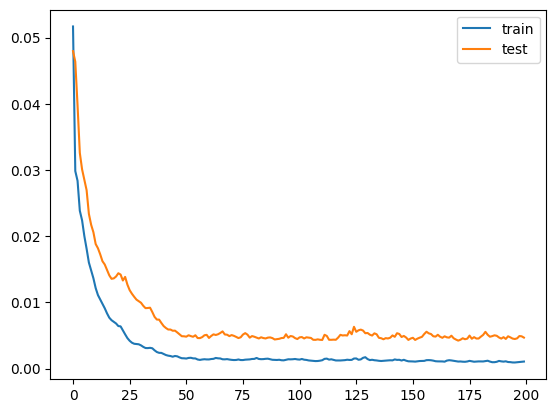

In [ ]:
n_features = train_X.shape[2]

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=1, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_predict = model.predict(test_X)

y_hat = mscaler.inverse_transform(y_predict.reshape(-1, y_predict.shape[-1]))
y_test = mscaler.inverse_transform(test_y.reshape(-1, test_y.shape[-1]))

rmse = sqrt(mean_squared_error(y_hat, y_test))
print('rmse', rmse)

212/212 [==============================] - 2s 7ms/step
rmse 20.139684263694576


In [ ]:
print(y_hat.shape)

(6772, 12)


In [ ]:
result = pd.DataFrame(y_hat)
result

0          1          2          3          4          5   \
0     111.401588   4.166038  22.959127  38.028732  18.594446   8.694621   
1      93.018837  -0.122738  22.879766  37.903538  18.309372  10.214727   
2     100.111679  -0.135090  22.869663  38.325451  18.134241  11.457972   
3      75.729294  -0.267139  22.849197  38.532421  17.976036  12.814501   
4      96.555191  -0.133239  22.825481  38.776360  17.765600  13.565526   
...          ...        ...        ...        ...        ...        ...   
6767  121.758041  -0.205476  25.339951  45.810959  26.133751   2.439962   
6768  119.223114  -0.039765  25.322023  45.753807  25.759869   3.308978   
6769  113.652344  -0.028211  25.309711  45.730949  25.423388   3.705664   
6770  451.462250  10.293290  25.335154  46.077415  25.498327   3.862536   
6771  276.610413  10.609265  25.298445  45.944393  24.859625   6.611740   

             6           7          8         9          10         11  
0     14.130681  752.311829  55.689579  4.688842  39.096931   6.304605  
1     13.474998  752.026611  57.300797  4.648414  38.052807   6.005136  
2     13.676858  751.689514  57.177967  4.592422  38.471367   6.236658  
3     13.453861  752.017273  58.197227  4.700552  38.302792   6.199486  
4     13.391430  751.928955  58.762310  4.787579  38.332626   6.266452  
...         ...         ...        ...       ...        ...        ...  
6767  21.990345  755.126099  53.285606  3.531568  22.948471  13.291498  
6768  21.693146  755.159180  53.943573  3.718016  24.246157  13.158998  
6769  21.391264  755.110291  54.530762  3.890717  25.388540  12.979529  
6770  21.091614  754.810791  54.102810  4.388966  28.151331  12.590866  
6771  20.181046  755.032898  56.272125  4.754817  28.148664  12.124421  

[6772 rows x 12 columns]

In [ ]:
test_df = pd.DataFrame(final_df.values[n_train:, :])
test_df

0    1   2          3          4          5         6   \
0    2016-04-10 17:00:00   70   0    22.4725   37.03225  17.323333  1.426667   
1    2016-04-10 17:10:00   60   0  22.493333  36.972738  17.463333  1.893333   
2    2016-04-10 17:20:00   90  10  22.492083   36.91575  17.926667  1.866667   
3    2016-04-10 17:30:00   90   0  22.474583  36.994762  17.926667  4.266667   
4    2016-04-10 17:40:00  110   0  22.486667    37.3355       17.4      6.29   
...                  ...  ...  ..        ...        ...        ...       ...   
6770 2016-05-27 17:20:00  100   0  24.869583  46.137881  24.796667       1.0   
6771 2016-05-27 17:30:00   90   0   24.84681  46.089286  24.196667       1.0   
6772 2016-05-27 17:40:00  270  10  24.818571  46.237738  23.626667       1.0   
6773 2016-05-27 17:50:00  420  10  24.758312  46.242246  22.433333       1.0   
6774 2016-05-27 18:00:00  430  10  24.740452  46.190804  21.026667       1.0   

             7           8          9         10         11         12  
0          15.0       751.2       57.0       5.0       40.0        6.4  
1         14.95  751.166667  57.333333       5.0       40.0   6.433333  
2          14.9  751.133333  57.666667       5.0       40.0   6.466667  
3         14.85       751.1       58.0       5.0       40.0        6.5  
4          14.8  751.066667  58.333333       5.0       40.0   6.533333  
...         ...         ...        ...       ...        ...        ...  
6770  22.733333       755.2  55.666667  3.333333  23.666667  13.333333  
6771       22.6       755.2       56.0       3.5       24.5       13.3  
6772  22.466667       755.2  56.333333  3.666667  25.333333  13.266667  
6773  22.333333       755.2  56.666667  3.833333  26.166667  13.233333  
6774       22.2       755.2       57.0       4.0       27.0       13.2  

[6775 rows x 13 columns]

In [ ]:
forecast_dates = pd.date_range(start='2016-05-27 18:10:00', periods=6772, freq='10min').to_list()

result.insert(0, 0, forecast_dates,True)


In [ ]:
result.columns = list(final_df.columns)
test_df.columns = list(final_df.columns)

test_df['date']=pd.to_datetime(test_df['date'])
result['date']=pd.to_datetime(result['date'])



In [ ]:
test_df.set_index('date', inplace=True)
result.set_index('date', inplace=True)

In [ ]:
final_df.set_index('date', inplace=True)


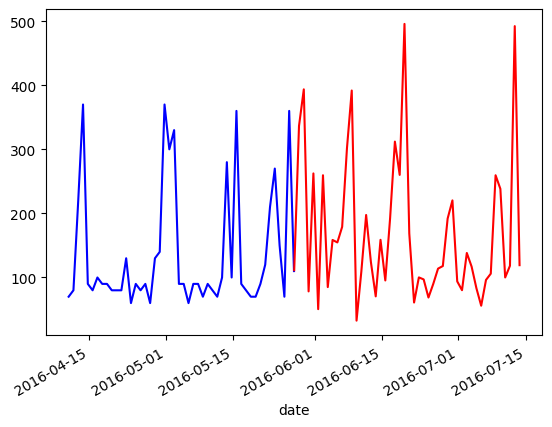

In [ ]:
test_df['Appliances'].asfreq('D').plot( color = 'b')
result['Appliances'].asfreq('D').plot( color = 'r')
plt.show()

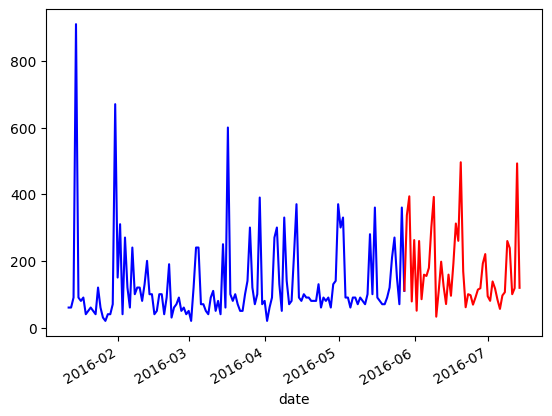

In [ ]:
final_df['Appliances'].asfreq('D').plot( color = 'b')
result['Appliances'].asfreq('D').plot( color = 'r')
plt.show()

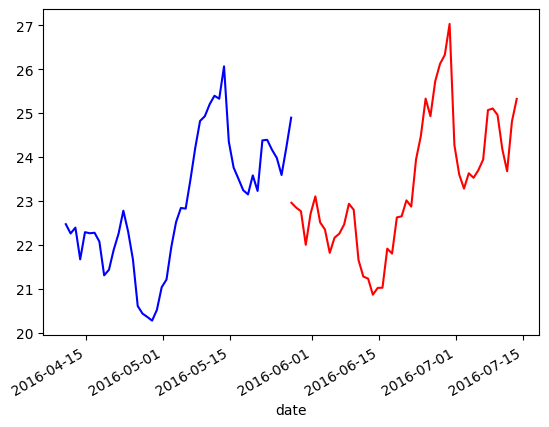

In [ ]:
test_df['Avreg_T_in'].asfreq('D').plot( color = 'b')
result['Avreg_T_in'].asfreq('D').plot( color = 'r')
plt.show()

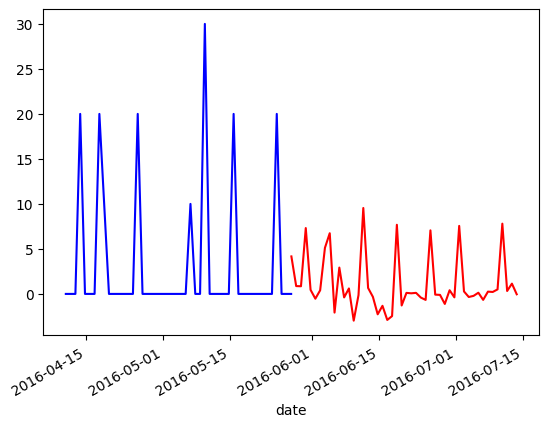

In [ ]:
test_df['lights'].asfreq('D').plot( color = 'b')
result['lights'].asfreq('D').plot( color = 'r')
plt.show()